In [1]:
from data_utils import *
from OCT_classifier2 import * 
from gradCam import *

## 1. Pre-processing:

In [2]:
preProcess = PreProcessing()
# preProcess.split_data()
# preProcess.split_data(True)

In [3]:
generators_dic = preProcess.getGenerators()
generator_train  = generators_dic['generator_train']
generator_val    = generators_dic['generator_val']
generator_test   = generators_dic['generator_test']
generator_warmup = generators_dic['generator_warmup']

Found 800 images belonging to 4 classes.
Found 73 images belonging to 4 classes.
Found 35 images belonging to 4 classes.
Found 35 images belonging to 4 classes.
Found 76 images belonging to 4 classes.


## Model Training:

In [5]:
clf=create_model(params)

In [6]:
clf.compile(optimizer = optim,
         loss       = params['compile']['loss'],
         metrics    = params['compile']['metrics'])

In [7]:
callbacks = get_callbacks("V1")

In [8]:
clf.fit(x                     = generator_warmup,
        validation_data       = generator_warmup,
        batch_size            = params['fit']['batch_size'],
        epochs                = params['fit']['epochs'],
        verbose               = params['fit']['verbose'],
        callbacks             = callbacks)

C:\Users\Skander\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


5/5 [==============================] - 93s 18s/step - loss: 1.3099 - accuracy: 0.3684 - val_loss: 1.2380 - val_accuracy: 0.4342


## Prediction:

In [18]:
y_proba = clf.predict(generator_test)
y_pred = y_proba.argmax(axis=1)

In [20]:
y_true = generator_test.classes
evaluate(y_true,y_pred)

              precision    recall  f1-score   support

           0       0.44      1.00      0.61        15
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        11

    accuracy                           0.43        35
   macro avg       0.11      0.25      0.15        35
weighted avg       0.19      0.43      0.26        35

[[15  0  0  0]
 [ 5  0  0  0]
 [ 3  0  0  1]
 [11  0  0  0]]


C:\Users\Skander\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Skander\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Skander\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Visualization:

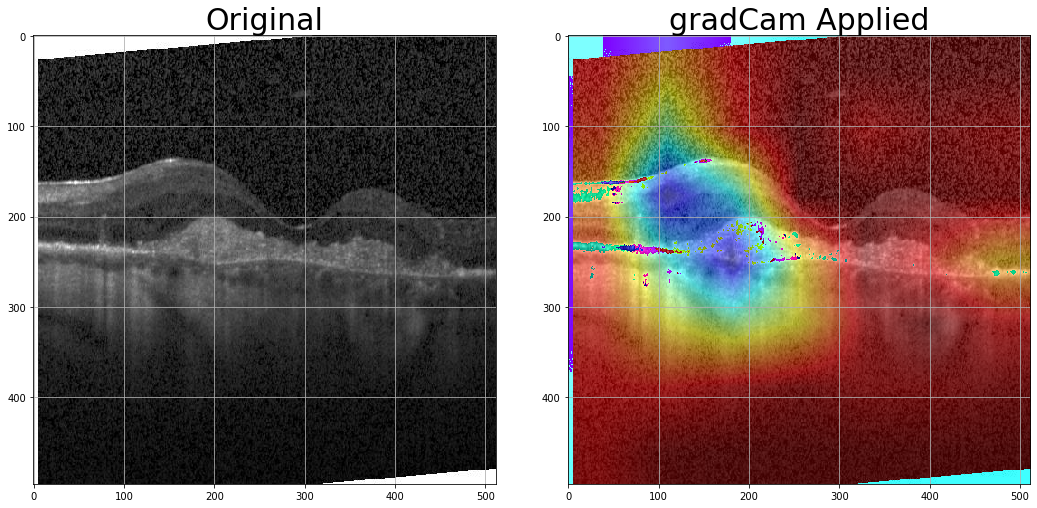

In [21]:
gradCAM(generator=generator_test,model=clf,params=params,image_num = 0, intensity=0.5, res=250)

In [5]:
os.getcwd()

'C:\\Users\\Skander\\Desktop\\FourthBrain\\FinalProject\\Optical-Coherence-Tomography\\src\\OCT_Model'

In [3]:

trainPath = 'C:\\Users\\Skander\\Desktop\\FourthBrain\\FinalProject\\Optical-Coherence-Tomography\\data\\OCT2017\\train'
testPath  = 'C:\\Users\\Skander\\Desktop\\FourthBrain\\FinalProject\\Optical-Coherence-Tomography\\data\\OCT2017\\test'

In [8]:
classes    = ["CNV","DME","DRUSEN","NORMAL"]
map_CNV    = {}
map_DME    = {}
map_DRUSEN = {}
map_NORMAL = {}

In [9]:
trainDir = os.path.join(trainPath,classes[0])
testDir  = os.path.join(testPath,classes[0])
trainFiles = os.listdir(trainDir)
testFiles  = os.listdir(testDir)

train_file = os.path.join(trainDir,trainFiles[0])
test_file  = os.path.join(testDir,testFiles[0])

In [12]:
for cl in classes:
    if cl == "CNV":
        MAP = map_CNV
    elif cl == "DME":
        MAP = map_DME
    elif cl == "DRUSEN":
        MAP = map_DRUSEN
    else:
        MAP = map_NORMAL
    
    # tarin/test dir
    trainDir = os.path.join(trainPath,cl)
    testDir  = os.path.join(testPath,cl)
    
    # list of file
    trainFiles = os.listdir(trainDir)
    testFiles  = os.listdir(testDir)
    print(cl)
    for file in trainFiles:
        train_path_file = os.path.join(trainDir,file)
        img_train = cv2.imread(train_path_file)
#         img_train = cv2.resize(img_train,(496, 512))
        for test_file in testFiles:
            test_path_file = os.path.join(testDir,test_file)
            img_test = cv2.imread(test_path_file)
#             img_test = cv2.resize(img_test,(496, 512))
            
            if (img_train.shape == img_test.shape) and ((img_train == img_test).all()):
                print(1)
                MAP[train_path_file]=test_path_file   

CNV
DME
DRUSEN
NORMAL


In [13]:
map_CNV

{}